## 💰 Gold Price Prediction

Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

📊 Data Collection and Processing

In [9]:
# Loading the csv data to pandas DataFrame

gold_data = pd.read_csv(r'C:\Users\hardi\Downloads\gld_price_data.csv')


In [10]:
#print first five rows in the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
#print last five rows in the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [13]:
# getting sum basic information about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## 🔗 Correlation :-

1. 📈 Positive Correlation  
2. 📉 Negative Correlation

In [21]:
correlation = gold_data.select_dtypes(include=['number']).corr()

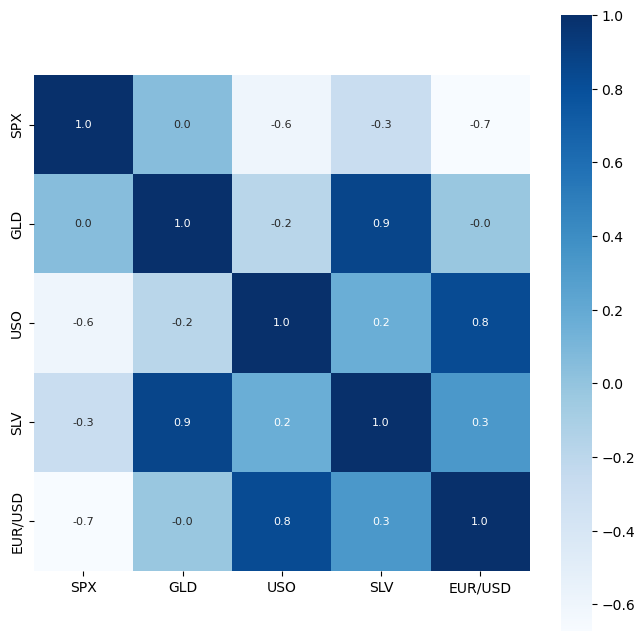

In [23]:
# constructing a heatmap to the understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 8},cmap='Blues')
plt.show()

In [25]:
# correlation Values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


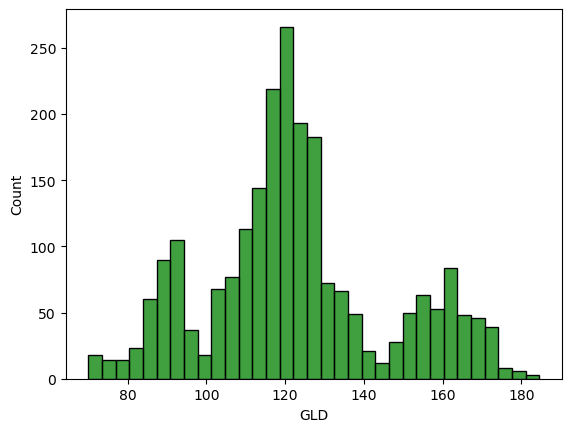

In [30]:
# checking te distribution of the GLD Price
sns.histplot(gold_data['GLD'], color='green')
plt.show()


Spliting the Features and Target

In [32]:
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [33]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [36]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


🧩 Splitting into Training Data and Test Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


 ⚙️ Model Training-Random Forest Regression


In [54]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train);

📊 Model Evaluation

In [66]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[122.19979973 130.70520299 127.36659963  96.51189706 119.17110072
 114.44299921 124.84980142 117.71139927 108.06190102  98.15659953
  95.3011989  167.54599921 148.23290165 116.34810091 170.84120173
  84.91860003 123.31069876 109.14809716 113.0850008  131.79420253
 124.37839848 113.60990087 116.01840041 108.69089962 108.2060007
 125.81129917 119.26329965 112.18869911 113.45890157 125.31739905
 146.06500199  89.46739992 167.59429995 113.83679957 108.28780081
 120.29760087 140.94729859 161.2891018  173.83889765 153.1902012
 119.33210088 113.88600042 121.33319937 113.76829959 122.15689987
 108.11640098  88.45589901 114.5952993  130.1075021  118.09900096
 103.99440019 130.14400233 107.16519831 160.41520364 131.59830041
 118.13349988 147.47180063 133.89060235  95.52800111 124.66390153
 115.32119876  86.17930067 104.28959926 113.90860058  84.27509954
 122.26370029 116.63769915 113.61060199 165.45910262  92.34449999
  80.55550078 160.8873012  158.89100231 106.73279976 149.92830094
 109.4100974

In [53]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R Square error:",error_score)

R Square error: 0.9896161777293416


Compare the Actual Values and Predicted Values in a Plot

In [55]:
y_test = list(y_test)

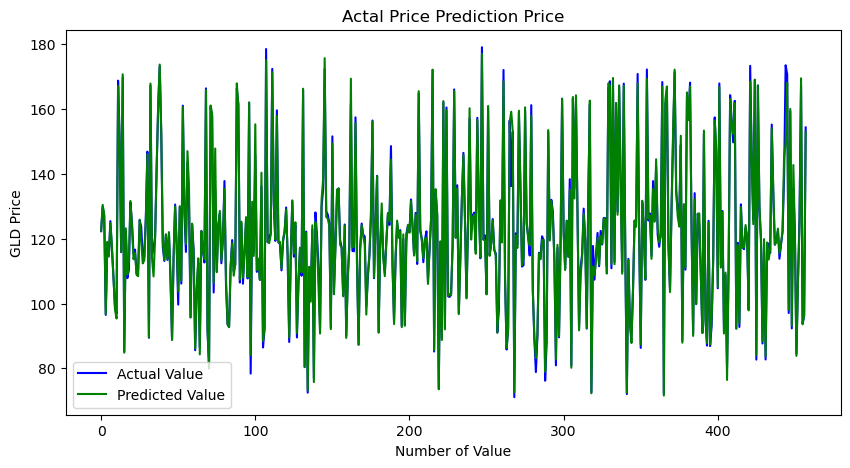

In [64]:
plt.figure(figsize=(10,5))
plt.plot(y_test,color='Blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price Prediction Price')
plt.xlabel('Number of Value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()